In [2]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 


In [3]:
df = pd.read_csv('data/values_from_the_instrument.csv')
df.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


<AxesSubplot: xlabel='cluster', ylabel='silhouette'>

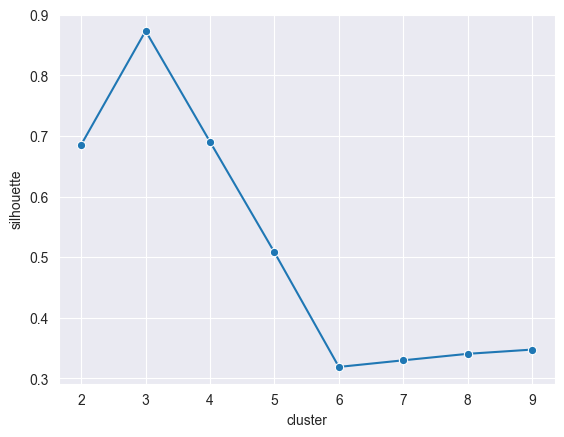

In [4]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['x1', 'x2']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

In [5]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]))

0.737175493807016


In [6]:
data = pd.read_csv('data/pokemon.csv')
data.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


In [7]:
from sklearn.cluster import AgglomerativeClustering
X = data[['Attack', 'Defense']]
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
agglomerative_clustering.fit(X)
agglomerative_clustering.labels_

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [8]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

In [9]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(data[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

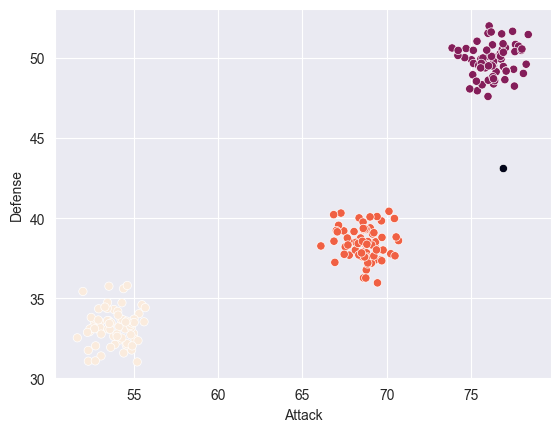

In [10]:
# Импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

# Запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(data[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=data.Attack, y=data.Defense, c=clustering.labels_)

In [14]:
df = pd.read_csv('data/housing.csv')
df.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


<AxesSubplot: xlabel='year', ylabel='price'>

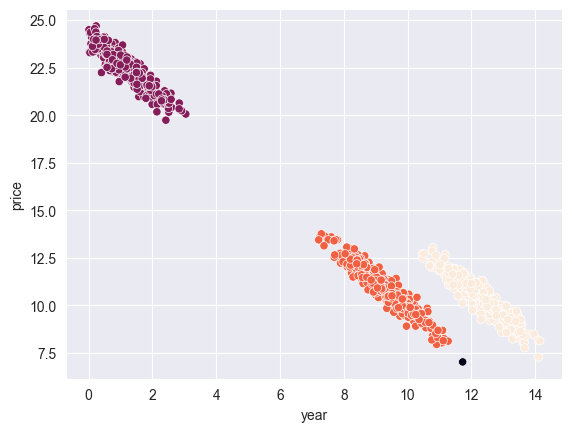

In [17]:
# Импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

# Запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=0.7, min_samples=5).fit(df[['year', 'price']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.year, y=df.price, c=clustering.labels_)